In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.animation import PillowWriter, FuncAnimation
import seaborn as sns
import pathlib
from mpl_toolkits.mplot3d import Axes3D

## Single time delay

In [2]:
data_array = np.loadtxt("../example_data/8")
data_array.shape

(100, 101)

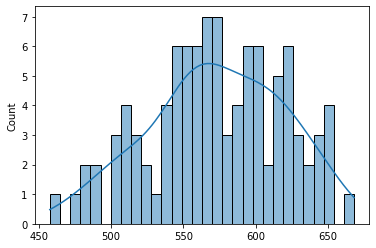

In [3]:
sns.histplot(data_array[:, 0], kde=True, bins=30)
plt.show()

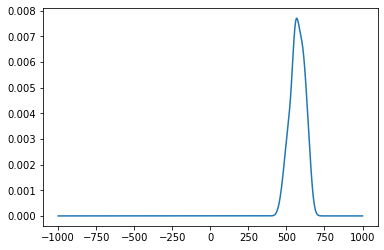

In [4]:
kde = gaussian_kde(data_array[:, 0])
x = np.linspace(-1000, 1000, 1000)

kde_values = kde(x)

plt.plot(x, kde_values)
plt.show()

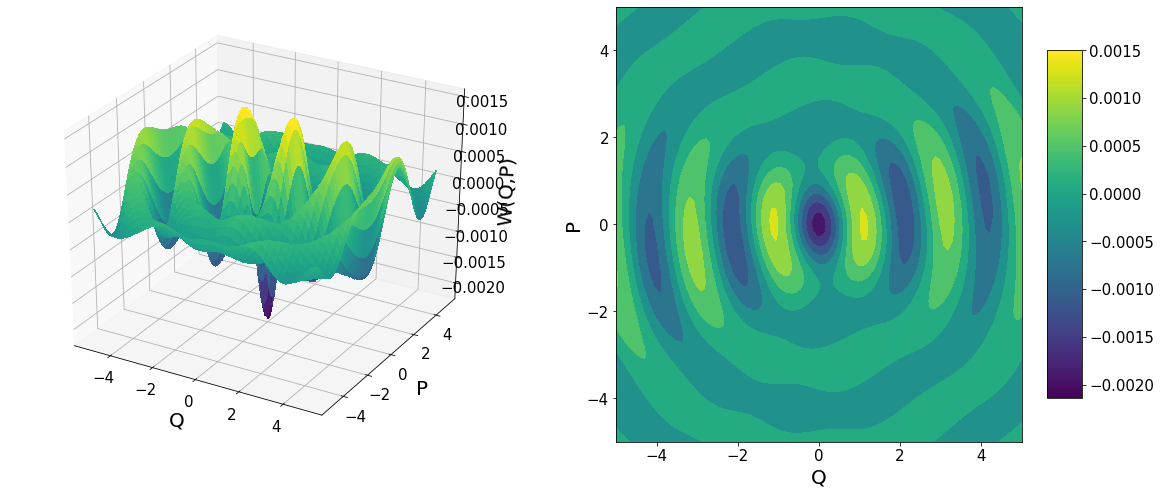

In [5]:
load_dir = "../work"
Q = np.loadtxt(f"{load_dir}/2/Q.dat")
P = np.loadtxt(f"{load_dir}/2/P.dat")
W = np.loadtxt(f"{load_dir}/2/W.dat")

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

x, y = np.meshgrid(Q, P)

surf = ax.plot_surface(x, y, W, cmap='viridis', antialiased=False)

ax.set_xlabel('Q', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('P', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('W(Q,P)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)

ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, W)

ax.set_xlabel('Q', fontsize=20)
ax.set_ylabel('P', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)


plt.show()

# Evolution of histogram

In [6]:
timedelay = np.loadtxt("../example_data/timedelay.dat")
full_data = []
for i in range(len(timedelay)):
    full_data.append(np.loadtxt(f"../example_data/{i}"))

full_data = np.array(full_data)
np.shape(full_data)

(10, 100, 101)

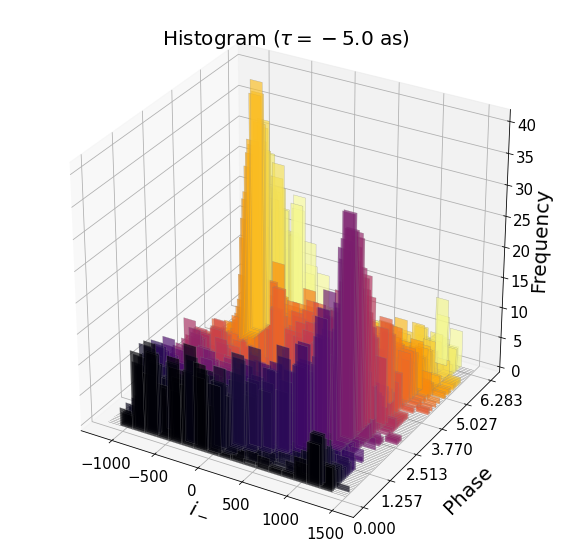

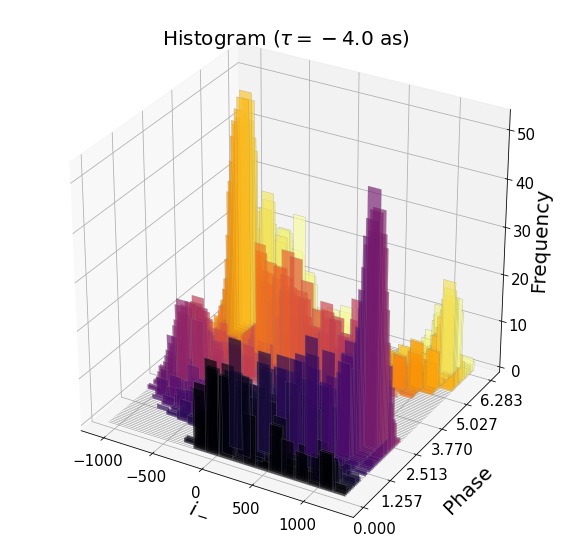

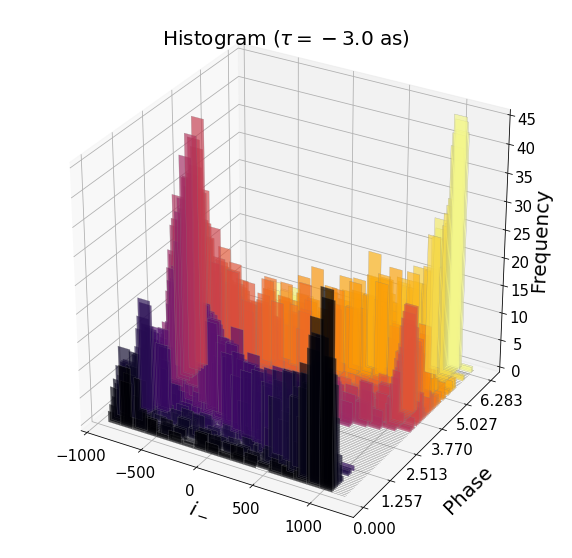

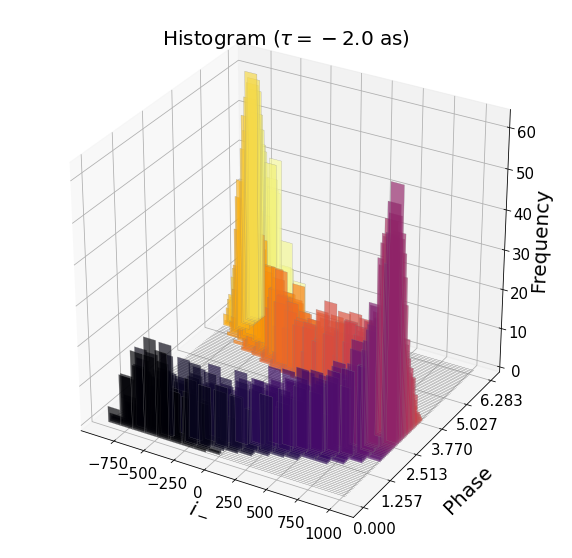

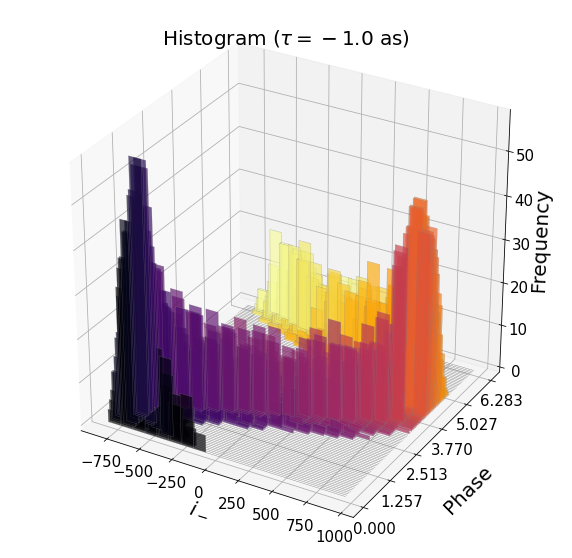

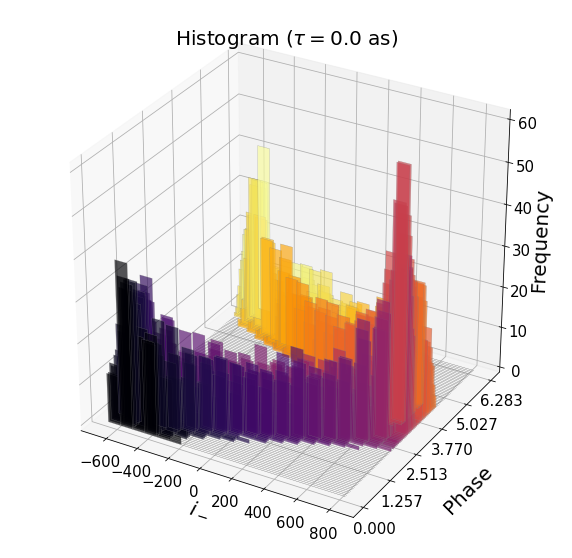

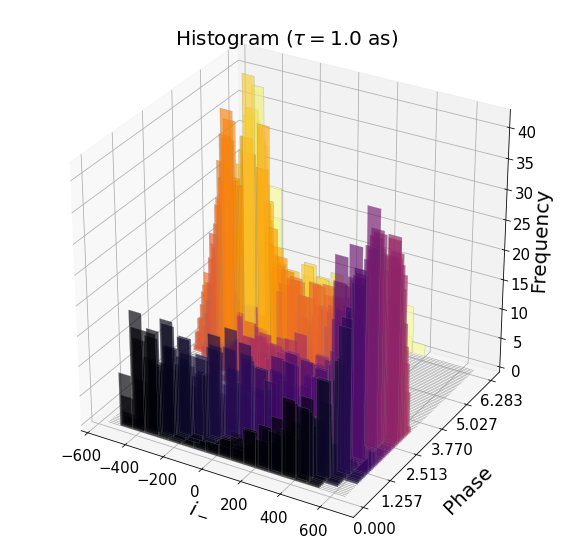

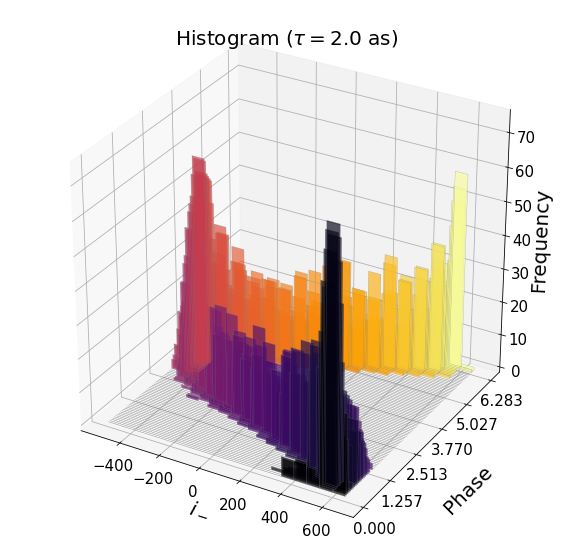

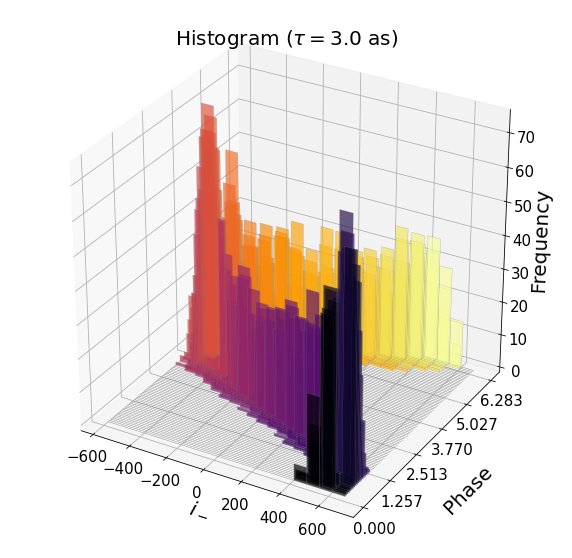

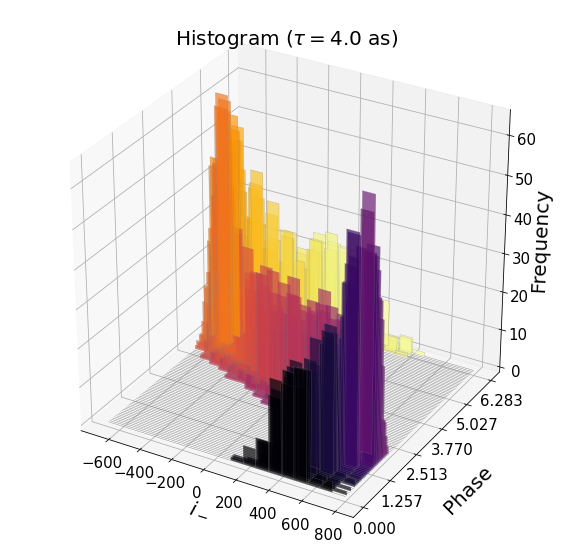

In [7]:
save_dir = "./"
for delay_index in range(full_data.shape[0]):
    data = full_data[delay_index, :, :] # Take subset of the full data

    # Number of columns (parameters)
    ncol = data.shape[1]

    # Create the 3D plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection="3d")

    # Define the colormap 
    my_cmap = plt.cm.inferno

    # Define the yticks (corresponding to columns/parameters)
    yticks = np.linspace(0, 2*np.pi, ncol)

    # Create evenly spaced bins between the minimum and maximum of the entire data
    xbins = np.linspace(data.min(), data.max(), 20)  # 50 bins for uniform distribution
    xcenter = np.convolve(xbins, np.ones(2), "valid") / 2  # Center points of the bins
    xwidth = np.diff(xbins)  # Width of each bin

    # Loop through each column and calculate histograms
    for i, ytick in enumerate(yticks):

        # Extract the current column from the data
        col = data[:, i]

        # Calculate histogram values for this column
        histvals, _ = np.histogram(col, bins=xbins)

        # Plot the histogram as bars along the Y-axis (for each parameter)
        ax.bar(left=xcenter, height=histvals, width=xwidth, zs=ytick, zdir="y", 
            color=my_cmap(i / ncol), alpha=0.666, edgecolor="grey", linewidth=0.3)

    # Set axis labels
    ax.set_xlabel("$i_-$", fontsize=20)
    ax.set_ylabel("Phase", fontsize=20)
    ax.set_zlabel("Frequency", fontsize=20)

    ax.set_title(f'Histogram ($\\tau = {1000*timedelay[delay_index]}$ as)', fontsize=20)

    # Label every other column number on the Y-axis
    ax.set_yticks(yticks[::20])
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='z', labelsize=15)
    ax.yaxis.labelpad=20

    # cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
    # cbar.ax.tick_params(labelsize=15)
    # Display the plot
    plt.show()
    # plt.savefig(f"{save_dir}/{delay_index}.png", dpi=500)
    # plt.close(fig)


In [ ]:
save_dir = "./"
for delay_index in range(full_data.shape[0]):
    fig, ax = plt.subplots(figsize=(10, 7))

    # delay_index = 0
    phase_index = 0

    def animate(index):

        ax.clear()

        sns.histplot(full_data[delay_index, :index, phase_index], kde=True, bins=30, ax=ax)
        ax.set_xlabel("$i_-$", fontsize=20)
        ax.set_ylabel("Frequency", fontsize=20)

        ax.set_title(f'Histogram ($\\tau = {1000*timedelay[delay_index]}$ as, Phase = {np.linspace(0, 2*np.pi, full_data.shape[2])[phase_index]})', fontsize=20)

        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)
        # sns.kdeplot(data_array[:, 10])
        # plt.show()

    animation = FuncAnimation(fig, animate, frames=range(0, full_data.shape[1]))
    animation.save(f"{save_dir}/{delay_index}.gif", dpi = 300, writer=PillowWriter(fps=5))
    plt.close(fig)

# All time delay

In [8]:
Q = []
P = []
W = []

timedelay = np.loadtxt(f"../example_data/timedelay.dat")
load_dir = "../work"

for i in range(len(timedelay)):
    Q.append(np.loadtxt(f"{load_dir}/{i}/Q.dat"))
    P.append(np.loadtxt(f"{load_dir}/{i}/P.dat"))
    W.append(np.loadtxt(f"{load_dir}/{i}/W.dat"))

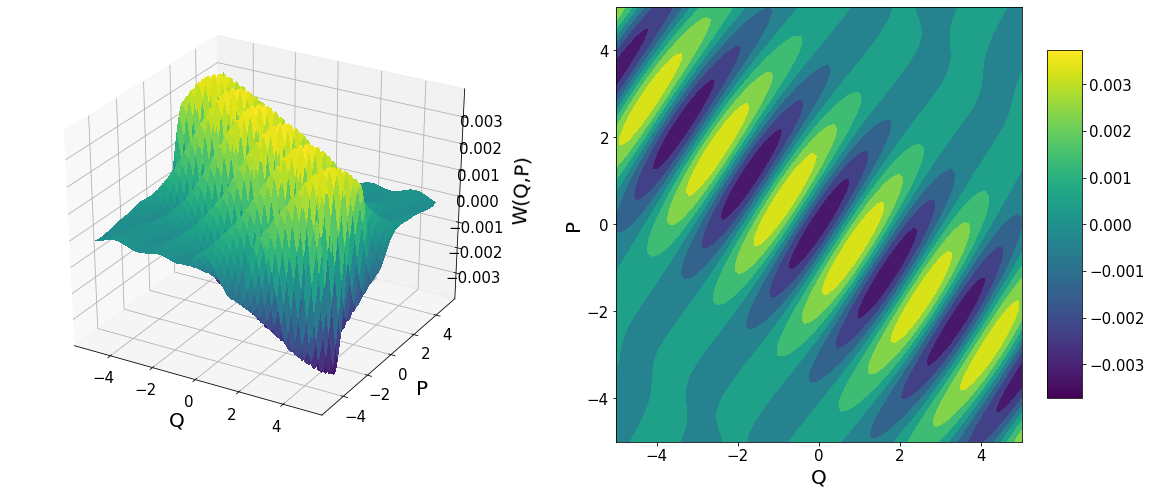

In [9]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
fig.set_size_inches(20, 8)

delay_index = 8

x, y = np.meshgrid(Q[delay_index], P[delay_index])

surf = ax.plot_surface(x, y, W[delay_index], cmap='viridis', antialiased=False)

ax.set_xlabel('Q', fontsize=20)
ax.xaxis.labelpad=10
ax.set_ylabel('P', fontsize=20)
ax.yaxis.labelpad=10
ax.set_zlabel('W(Q,P)', fontsize=20)
ax.zaxis.labelpad=10
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)
ax.zaxis.labelpad=20

ax = fig.add_subplot(122)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.contourf(x, y, W[delay_index])

ax.set_xlabel('Q', fontsize=20)
ax.set_ylabel('P', fontsize=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=15)
# ax.set_zlabel('W($\\alpha$)', fontsize=20)


plt.show()

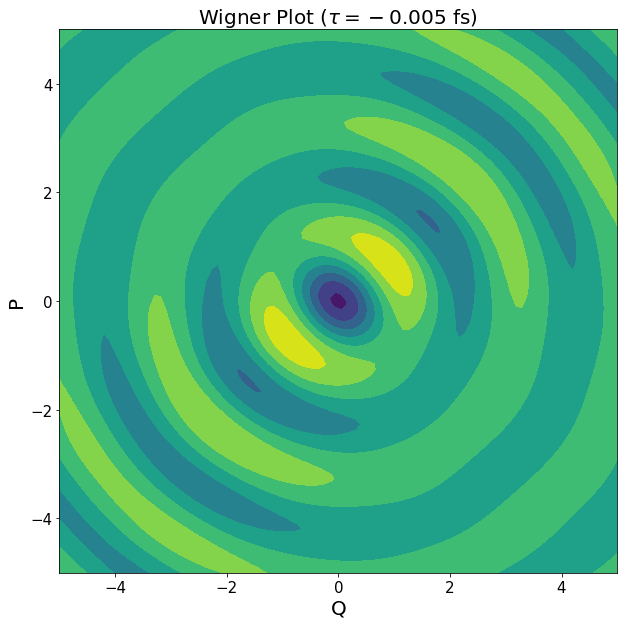

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))


def animate(index):
    x, y = np.meshgrid(Q[index], P[index])


    ax.clear()

    # plot a 3D wireframe like in the example mplot3d/wire3d_demo
    ax.contourf(x, y, W[index])

    ax.set_xlabel('Q', fontsize=20)
    ax.set_ylabel('P', fontsize=20)

    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)


    # cbar = fig.colorbar(surf, ax=ax, shrink=0.8, aspect=10)
    # cbar.ax.tick_params(labelsize=15)


    ax.set_title(f'Wigner Plot ($\\tau = {timedelay[index]}$ fs)', fontsize=20)
    # if s_theta != 0:
    #     plt.figtext(0.4, 0.9, f'$r = {squeezing_param[index]}$, $\\theta = \pi/{np.pi/s_theta}$', ha='center', va='center', fontsize=20)
    # else:
    #     plt.figtext(0.4, 0.9, f'$r = {squeezing_param[index]}$, $\\theta = 0$', ha='center', va='center', fontsize=20)

animation = FuncAnimation(fig, animate, frames=range(0, len(timedelay)))
animation.save("w_plot_animation.gif", dpi = 300, writer=PillowWriter(fps=1/2))